In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generación de datos aleatorios y transformación inicial

genera puntos aleatorios y aplicando una transformación lineal seguida de una rotación.
```matlab
p = randn([2,100000]);
H = diag([10,5]);
an = 30 * 180 / pi;
R = [cos(an), -sin(an); sin(an), cos(an)];
p2 = ((R * H * p) + [26; 61]);

In [7]:
# Generar 100,000 muestras aleatorias de una distribución normal (2D)
p = np.random.randn(2, 100000)

# Matriz de escala (H) y ángulo de rotación (an)
H = np.diag([10, 5])
# an = 30 * np.pi / 180  # Convertir a radianes
an = 30 * 180 / np.pi  # Convertir a grados
R = np.array([[np.cos(an), -np.sin(an)], [np.sin(an), np.cos(an)]])

# Aplicar transformación y traslación
p2 = (R @ H @ p) + np.array([[26], [61]])


# 2. Cálculo de la media y covarianza

calcula la media y la covarianza de los puntos transformados.
```matlab
m = mean(p2')';
s = cov(p2')';

In [8]:
# Calcular la media y la covarianza de los puntos transformados
m = np.mean(p2, axis=1)
s = np.cov(p2)

# 3. Definir los parámetros para los Sigma Points

define los parámetros para el Unscented Transform y calculas los sigma points.

```matlab
n = 2;
alpha = 1;
beta = 2;
k = 1;
lambda = alpha**2 * (n + k) - n;
q=chol((n+lambda)*s)'


In [1]:
# define los parámetros para el Unscented Transform y calculas los sigma points.\

n = 2
alpha = 1
beta = 2
k = 1
lambda_ = alpha ** 2 * (n + k) - n

# Calcular la raíz de Cholesky
q = np.linalg.cholesky((n + lambda_) * s).T

SyntaxError: invalid syntax (3300790915.py, line 1)

# 4. Generar los Sigma Points
Calcula los sigma points basados en la media y la covarianza.
```matlab
Sigma0 = m;
Sigma1 = m + q[:,0];
Sigma2 = m + q[:,1];
Sigma3 = m - q[:,1];
Sigma4 = m - q[:,0];


In [10]:
# Generar los sigma points
Sigma0 = m
Sigma1 = m + q[:, 0]
Sigma2 = m + q[:, 1]
Sigma3 = m - q[:, 1]
Sigma4 = m - q[:, 0]

# 5. Asignar pesos a los Sigma Points
Asigna los pesos para la media (w_m) y para la covarianza (w_c).
```matlab
w0m = lambda / (n + lambda);
w0c = lambda / (n + lambda) + (1 - alpha**2 + beta);
w1m = 1 / (2 * (n + lambda));
w1c = w1m;


In [11]:
# Pesos para la media y covarianza
w0m = lambda_ / (n + lambda_)
w0c = lambda_ / (n + lambda_) + (1 - alpha ** 2 + beta)
w1m = 1 / (2 * (n + lambda_))
w1c = w1m


# 6. Cálculo de la media y la covarianza transformadas
Calcula la media y la covarianza de los sigma points.
```matlab
m2 = w0m * Sigma0 + w1m * (Sigma1 + Sigma2 + Sigma3 + Sigma4);
s2 = w0c * (Sigma0 - m2) * (Sigma0 - m2)' + ...
     w1c * ((Sigma1 - m2) * (Sigma1 - m2)' + ...
     (Sigma2 - m2) * (Sigma2 - m2)' + ...
     (Sigma3 - m2) * (Sigma3 - m2)' + ...
     (Sigma4 - m2) * (Sigma4 - m2)');


In [12]:
# Calcular la media transformada
m2 = w0m * Sigma0 + w1m * (Sigma1 + Sigma2 + Sigma3 + Sigma4)

# Calcular la covarianza transformada
s2 = (
        w0c * np.outer(Sigma0 - m2, Sigma0 - m2)
        + w1c * (np.outer(Sigma1 - m2, Sigma1 - m2)
                 + np.outer(Sigma2 - m2, Sigma2 - m2)
                 + np.outer(Sigma3 - m2, Sigma3 - m2)
                 + np.outer(Sigma4 - m2, Sigma4 - m2))
)


# 7. Transformación no lineal funcG y cálculos finales
aplica una función no lineal y calcula la media y covarianza posterior.
```matlab
Y0 = funcG(Sigma0);
Y1 = funcG(Sigma1);
Y2 = funcG(Sigma2);
Y3 = funcG(Sigma3);
Y4 = funcG(Sigma4);
my2 = w0m*Y0 + w1m*(Y1 + Y2 + Y3 + Y4);


In [13]:
# Transformación no lineal funcG y cálculos finales
# aplica una función no lineal y calcula la media y covarianza posterior

def funcG(x):
    return np.array([
        1 / (1 + np.exp(-(x[0] - 30) / 10)),
        1 / (1 + np.exp(-(x[1] + 10) / 10))
    ])


Y0 = funcG(Sigma0)
Y1 = funcG(Sigma1)
Y2 = funcG(Sigma2)
Y3 = funcG(Sigma3)
Y4 = funcG(Sigma4)

my2 = w0m * Y0 + w1m * (Y1 + Y2 + Y3 + Y4)


# 8. Gráficas
graficamos los puntos originales y los transformados.

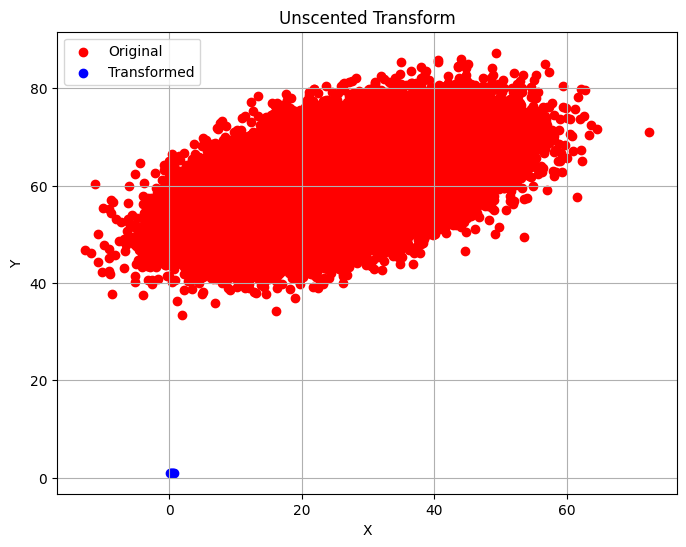

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(p2[0, :], p2[1, :], c='r', label='Original')
plt.scatter([Y0[0], Y1[0], Y2[0], Y3[0], Y4[0]],
            [Y0[1], Y1[1], Y2[1], Y3[1], Y4[1]],
            c='b', label='Transformed')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.title('Unscented Transform')
plt.show()


#  función no lineal de \\(\mathbb{R}^2\\) a \\(\mathbb{R}^2\\). que varíe no linealmente en el intervalo de las coordenadas de los puntosLa ecuación es la siguiente:


1. **Primera Componente** \\(y_1\\):

$$
y_1 = \sin\left(\frac{x_0}{10}\right) + 0.5 \cdot \frac{x_1^2}{100}
$$

   - **Descripción**:
     - El término \\(\sin\left(\frac{x_0}{10}\right)\\) introduce una variación periódica en función de la primera coordenada \\(x_0\\).
     - El término cuadrático \\(0.5 \cdot \frac{x_1^2}{100}\\) añade un efecto no lineal basado en la segunda coordenada \\(x_1\\), ajustado por un factor de escala para controlar su magnitud.

2. **Segunda Componente** \\(y_2\\):

   $$
   y_2 = \cos\left(\frac{x_1}{10}\right) + 0.3 \cdot \frac{x_0^2}{100}
   $$

   - **Descripción**:
     - El término \\(\cos\left(\frac{x_1}{10}\right)\\) proporciona una variación periódica en función de la segunda coordenada \\(x_1\\).
     - El término cuadrático \\(0.3 \cdot \frac{x_0^2}{100}\\) introduce una dependencia no lineal adicional en la primera coordenada \\(x_0\\), con un factor de escala que atenúa su impacto.




In [15]:
def funcG_2(x):
    """
    Nueva función no lineal que mapea R^2 -> R^2.
    Combina funciones trigonométricas y cuadráticas para mayor no linealidad.
    """
    return np.array([
        np.sin(x[0] / 10) + 0.5 * (x[1] ** 2) / 100,  # Primera componente
        np.cos(x[1] / 10) + 0.3 * (x[0] ** 2) / 100  # Segunda componente
    ])

In [16]:
# Calcular los sigma points transformados con la nueva función no lineal
Y0 = funcG_2(Sigma0)
Y1 = funcG_2(Sigma1)
Y2 = funcG_2(Sigma2)
Y3 = funcG_2(Sigma3)
Y4 = funcG_2(Sigma4)

# Calcular la nueva media transformada
my2 = w0m * Y0 + w1m * (Y1 + Y2 + Y3 + Y4)

# Calcular la nueva covarianza transformada
sy2 = (
        w0c * np.outer(Y0 - my2, Y0 - my2) +
        w1c * (np.outer(Y1 - my2, Y1 - my2) +
               np.outer(Y2 - my2, Y2 - my2) +
               np.outer(Y3 - my2, Y3 - my2) +
               np.outer(Y4 - my2, Y4 - my2))
)

# Imprimir resultados
print("Media transformada (my2):\n", my2)
print("\nCovarianza transformada (sy2):\n", sy2)


Media transformada (my2):
 [19.0685222   3.16730822]

Covarianza transformada (sy2):
 [[9.49653358 0.76012298]
 [0.76012298 2.67989321]]


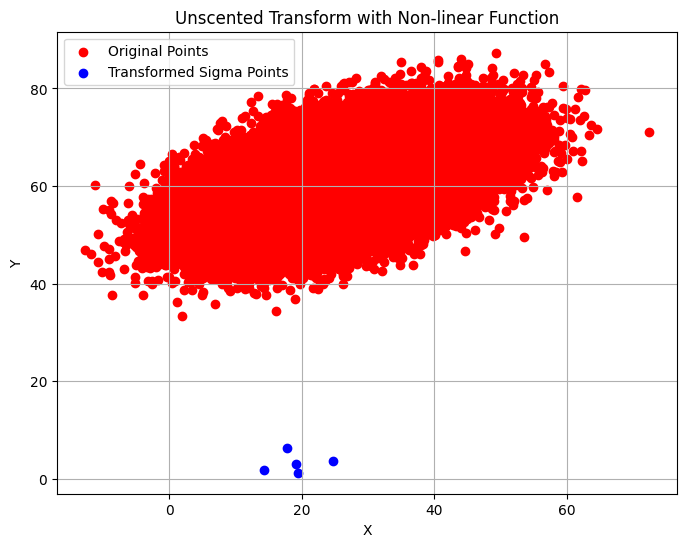

In [17]:
# Graficar puntos originales vs puntos transformados
plt.figure(figsize=(8, 6))
plt.scatter(p2[0, :], p2[1, :], c='r', label='Original Points')
plt.scatter([Y0[0], Y1[0], Y2[0], Y3[0], Y4[0]],
            [Y0[1], Y1[1], Y2[1], Y3[1], Y4[1]],
            c='b', label='Transformed Sigma Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.title('Unscented Transform with Non-linear Function')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

true_states = np.array(true_states)
predicted_states = np.array(predicted_states)
measurements = np.array(measurements)

plt.figure(figsize=(10, 8))

# Graficar el estado verdadero
plt.plot(true_states[:, 0], true_states[:, 1], label="Estado Verdadero", color="g")

# Graficar las predicciones
plt.plot(predicted_states[:, 0], predicted_states[:, 1], label="Predicción UKF", color="b")

# Graficar las mediciones
plt.scatter(measurements[:, 0], measurements[:, 1], label="Mediciones", color="r", marker='x')

plt.xlabel("Posición X")
plt.ylabel("Posición Y")
plt.title("Filtro de Kalman No Lineal (UKF) - Predicción vs Mediciones")
plt.legend()
plt.grid(True)
plt.show()
